In [1]:
import sys
import os

sys.path.insert(1, os.path.join(sys.path[0], '..')) 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import yaml
from pathlib import Path
import math

import simulation
import randomness_test
import gsr

# Configure simulation settings

<b>Set path to simlation config file (yaml) and load the simulation config into a Python dictionary</b>

Using the config, we set all the settings which we will use for our simulation.
* random_seed: this allows another user to replicate the results of running the simulations
* n_experiments: the number of times we run a simulation. E.g.: when n_experiments = 20, the simulation will be ran 20 times repeatedly
* n_cards: the number of cards in the deck
* max_riffle_shuffles: maximum number of riffle shuffles performed per experiment

In [3]:
simulation_config_name = "simulation_config.yml"
simulation_config_folder = Path('../config')
simulation_config_path = simulation_config_folder / simulation_config_name

In [4]:
with open(simulation_config_path, "r") as f:
    cfg_load = yaml.safe_load(f)

In [5]:
cfg = cfg_load['simulation_config']
riffle_shuffle_cfg = cfg['riffle_shuffle']

In [6]:
RANDOM_SEED = cfg['random_seed'] 
N_TRIALS = riffle_shuffle_cfg['n_trials']
N_CARDS = riffle_shuffle_cfg['n_cards']
MAX_RIFFLE_SHUFFLES = riffle_shuffle_cfg['max_riffle_shuffles']
A = 2

# Run riffle shuffle simulation

In [7]:
results = simulation.riffle_shuffle_simulation(
    n_trials=20,
    max_n_riffle_shuffle=15,
    n_cards_in_deck=52,
    random_seed=RANDOM_SEED
    )

# Simulation results 

In [138]:
results

[[deque([1, 2, 3, 4, 5, 6]),
  deque([3, 4, 1, 2, 5, 6]),
  deque([3, 2, 5, 4, 1, 6]),
  deque([3, 2, 4, 5, 1, 6]),
  deque([3, 4, 2, 5, 1, 6]),
  deque([3, 4, 5, 2, 1, 6]),
  deque([4, 3, 5, 2, 1, 6]),
  deque([2, 1, 6, 4, 3, 5]),
  deque([4, 3, 5, 2, 1, 6]),
  deque([4, 1, 3, 5, 2, 6]),
  deque([5, 4, 2, 1, 6, 3])],
 [deque([1, 2, 3, 4, 5, 6]),
  deque([1, 2, 5, 6, 3, 4]),
  deque([1, 6, 2, 3, 5, 4]),
  deque([3, 5, 1, 4, 6, 2]),
  deque([3, 4, 6, 2, 5, 1]),
  deque([3, 5, 4, 6, 1, 2]),
  deque([3, 4, 6, 5, 1, 2]),
  deque([3, 4, 6, 1, 5, 2]),
  deque([3, 5, 4, 6, 2, 1]),
  deque([6, 3, 2, 5, 1, 4]),
  deque([2, 5, 1, 4, 6, 3])]]

In [55]:
#3 --> r=4
34
2
1
56

#4 --> r=3
3456
2
1

1

In [56]:
trials_rising_sequences = []

for trial in results:
    rising_sequences = [deck.rising_sequences for deck in trial]
    trials_rising_sequences.append(rising_sequences)

In [57]:
eul = []

for r in trials_rising_sequences[0]:
    e = randomness_test.eulerian(n=6, r=r)
    eul.append(e)

In [47]:
len()

52

In [58]:
p_val = []

for r in trials_rising_sequences[0]:
    p = gsr.prob_rising_sequences(a=2, n=6, r=r)
    p_val.append(p)

In [60]:
p_val, eul

([0.328125, 0.234375, 0.09375], [1, 57, 302])

In [77]:
np.asarray(p_val) * np.asarray(eul)

array([1.6541271071369095e-31, 5.321090159517953e-17, 4.1639416751596e-09,
       0.00048411424370241947, 0.9995158815923558, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0], dtype=object)

In [16]:
result_rising_sequences = []

for exp in results:
    exp_list = []
    for deck in exp:
        exp_list.append(deck.rising_sequences)
    result_rising_sequn

In [36]:
eul_results = []
p_val_results = []

for each_trial in result_trial_rising_sequences:
    eul = [randomness_test.eulerian(N_CARDS, r) for r in each_trial]
    p_val = [gsr.prob_rising_sequences(a=2, n=N_CARDS, r=r) for r in each_trial]
    
    eul_results.append(eul)
    p_val_results.append(p_val)

In [39]:
np.sum(p_val_results[0]) * np.sum(eul_results[0])

17468091.77444983

In [40]:
for e_trial, p_trial in zip(eul_results, p_val_results):
    print(np.sum(e_trial) * np.asarray(p_trial))

[1999587.17936467 1924131.05938864 1777572.05712752 1501867.00336896
 1189884.9688527   719735.29823286  814055.44820289  548507.94905649
  509328.80983817  674751.8420933   589138.16750512  548507.94905649
  548507.94905649  509328.80983817  589138.16750512  509328.80983817
  589138.16750512  509328.80983817  435323.76909245  471600.74985016
  509328.80983817]
[-137438.68418963 -132252.31874851 -122178.80125711 -103228.61983764
  -90063.23064095  -66425.37276509  -46378.07557923  -43385.94167089
  -29921.33908337  -35007.96672755  -43385.94167089  -35007.96672755
  -37700.88724505  -43385.94167089  -35007.96672755  -25233.66262698
  -29921.33908337  -25233.66262698  -32414.78400699  -29921.33908337
  -29921.33908337]
[-215445.60967294 -207315.58666641 -191524.5804422  -161818.72714912
 -115852.82784299 -109911.65718438  -77547.91175455  -50812.64379079
  -54877.65529405  -46903.9788838   -54877.65529405  -54877.65529405
  -46903.9788838   -54877.65529405  -59099.01339359  -59099.01339

In [20]:
uniform_dist = np.random.uniform(size=N_CARDS)

In [10]:
result_P_r

[[1,
  4503599627370443,
  -1272381345782417671,
  4439281314766845212,
  -8544001251241770388,
  -6055992480628104760,
  -8379118330818010337,
  6474331348535498020,
  6474331348535498020,
  624850905593674664,
  -1175702916903134484,
  6474331348535498020,
  6474331348535498020,
  6474331348535498020,
  -1175702916903134484,
  6474331348535498020,
  -1175702916903134484,
  6474331348535498020,
  -2927157577578511624,
  -1175702916903134484,
  6474331348535498020],
 [1,
  4503599627370443,
  -1272381345782417671,
  4439281314766845212,
  6971133518283268686,
  -3336101570576168633,
  624850905593674664,
  -2927157577578511624,
  -2927157577578511624,
  6474331348535498020,
  -2927157577578511624,
  6474331348535498020,
  6474331348535498020,
  -2927157577578511624,
  6474331348535498020,
  -6055992480628104760,
  -2927157577578511624,
  -6055992480628104760,
  -1175702916903134484,
  -2927157577578511624,
  -2927157577578511624],
 [1,
  4503599627370443,
  -1272381345782417671,
  4439

In [21]:
result_distance_from_uniform = []

for each_trial in result_P_r:
    distance_from_uniform = []
    tvd = randomness_test.total_variation_distance()

TypeError: total_variation_distance() missing 2 required positional arguments: 'P' and 'Q'

In [27]:
def prob_rising_sequences(a, n, r):
    return math.comb((a+n-r), a) / (a**n)

array([0.76932394, 0.90387216, 0.07591444, 0.96712321, 0.82649417,
       0.080683  , 0.04860681, 0.88030106, 0.15427114, 0.08422554,
       0.78229029, 0.08461378, 0.03214034, 0.31062533, 0.99587386,
       0.5485173 , 0.35677665, 0.82963764, 0.73736571, 0.54033081,
       0.86412986, 0.3243223 , 0.6064456 , 0.93760615, 0.82404767,
       0.81173954, 0.30295442, 0.58023   , 0.7812677 , 0.75119752,
       0.52633309, 0.02733839, 0.24896294, 0.2933733 , 0.35900073,
       0.08674013, 0.62736644, 0.86083343, 0.12881112, 0.26025591,
       0.61751444, 0.8131009 , 0.34697218, 0.86262764, 0.23849193,
       0.81419909, 0.90945801, 0.17201998, 0.45177035, 0.96680219,
       0.52365218, 0.92235823])

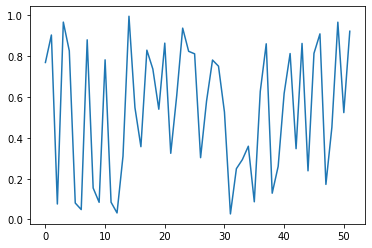

In [16]:
plt.plot(uniform_dist)

In [22]:
result_P_r[:2]

[[3.0597746558669314e-13,
  1325.9999999999843,
  -346093.6312168398,
  1020218.6119875745,
  -1555662.4934949807,
  -666971.4270638538,
  -1043761.8288758674,
  543409.1509540591,
  504594.2116001977,
  64516.31919836192,
  -105989.74681534314,
  543409.1509540591,
  543409.1509540591,
  504594.2116001977,
  -105989.74681534314,
  504594.2116001977,
  -105989.74681534314,
  504594.2116001977,
  -194987.8643600197,
  -84844.00915021311,
  504594.2116001977],
 [3.0597746558669314e-13,
  1325.9999999999843,
  -346093.6312168398,
  1020218.6119875745,
  1397756.0369160073,
  -493348.3945820889,
  64516.31919836192,
  -282732.4033220286,
  -194987.8643600197,
  504594.2116001977,
  -282732.4033220286,
  504594.2116001977,
  543409.1509540591,
  -282732.4033220286,
  504594.2116001977,
  -340209.21582087706,
  -194987.8643600197,
  -340209.21582087706,
  -84844.00915021311,
  -194987.8643600197,
  -194987.8643600197]]

1325.9999999999843

In [78]:
np.sum(np.asarray(eul) * np.asarray(p_val))

1.0

In [76]:
eul

[1,
 4503599627370443,
 6461081650535893048297331,
 20282067166317747370548924397305,
 2219371090444690280167825067011163404,
 28980470297130316118851707371113927682308,
 86585645711842456879259291396042785694734772,
 86713283824808603371563209439361605206738793756,
 37025109959688438829553523840364680262742546084490,
 7911300235037463075597685089436522698036110779652974,
 945840628557918451844218451393465611283022070265930318,
 68592119011285455655624013113555233530495826611028105002,
 3204605114791094679078453140281792404372059654677564605036,
 101000927132657645557134474918099624296907772735089756696100,
 2226078789301170911355122880657959428046783979202356910922164,
 35302220045338224161235549913989821979876198108712965566590748,
 412144632644776097452355282034303085724026998555266406163630407,
 3608546499010535175417741799325030679058798554326570866008941901,
 24054768032110205230512644571794784352350441257804171198293416085,
 123593420813766502721516289401928881854407236400906448

In [75]:
p_val

[1.6541271071369095e-31,
 1.1815193622406496e-32,
 6.44465106676718e-34,
 2.3869078025063628e-35,
 4.503599627370496e-37,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [130]:
a=5
n=6
m=20

rs = []
eul = []
p_val = []

for r in range(1, n+1):
    rs.append(r)
    eul.append(eulerian(n, r)) # calculate all permutations that can lead to r rising sequences
    p_val.append(prob_arrangement(a, n, r, m)) # calculate probability that there are r rising sequences, after m shuffles

In [298]:
def eulerian(n: int, r: int) -> int:
    """
    This function returns the Eulerian number for n, according to the explicit formula, see here: https://en.wikipedia.org/wiki/Eulerian_number

    :param  n: total number of elements considered (0 to n).
            r: number of possible permutations with r ascents

    :return Eulerian number as an integer
    """
    if n < 0 or r < 0:
        return 0
    elif n == 0 and r == 0:
        return 1
    elif n <= r:
        return 0

    result = 0

    for i in range(0, r+1):
        result += ((-1)**i) * math.comb(n+1, i) * ((r-i)**n)

    return result

In [299]:
import math
def probability_permutation(a, n, r, k):
    return math.comb((a**k) + n - r, n) / (a**(k*n))

In [300]:
np.sum(np.asarray(eul) * np.asarray(p_val))

NameError: name 'p_val' is not defined

In [301]:
np.asarray(eul) * np.asarray(p_val)

NameError: name 'p_val' is not defined

In [302]:
rising_sequences_per_trial = []

for trial in results:
    rising_sequences_after_k = []
    for permutation in trial:
        rising_sequences_after_k.append(permutation.rising_sequences)
        
    rising_sequences_per_trial.append(rising_sequences_after_k)

In [312]:
list_of_r = rising_sequences_per_trial[0]

In [313]:
k = 2
r = 4

In [314]:
# probability of a specific permutation with r rising sequences, after k shuffles:
prob_perm_w_r = probability_permutation(a=2, n=52, r=r, k=k)

In [315]:
# all possible permutations with rising sequences:
possible_perms_w_r = eulerian(n=52, r=r)

In [316]:
# so probability of a specific permutation with r rising sequences * all possible permutations = 1
prob_perm_w_r * possible_perms_w_r

0.9999831165359238

In [317]:
# now we have a list of rising sequences, after k shuffles
list_of_r

[0.0004,
 0.0008,
 0.0016,
 0.0026,
 0.0044,
 0.004,
 0.0052,
 0.0054,
 0.0046,
 0.005,
 0.0052,
 0.0052,
 0.0054,
 0.005,
 0.0054]

In [271]:
# for each shuffle, sample how many rising sequences are present

In [272]:
p_vals_per_trial = []
eul_vals_per_trial =[]
tvd_per_trial = []

p_uniform = 1.0/math.factorial(52)

for trial in rising_sequences_per_trial[:1]:
    prob_dist = []
    pvals_trial = []
    eul_trial = []
    tvd_trial = []
    
    for k, r in enumerate(trial, start=1):
        print(k, r)
        p_permutation = probability_permutation(a=2, n=52, r=r, k=k)
        eul = eulerian(n=52, r=r)
        tvd_diff = abs(p_permutation - p_uniform)
        tvd_r = eul * tvd_diff
        
        tvd_trial.append(tvd_r)
        
        
#         print(f"Probability of having {r} rising sequences, after {k} shuffles is: {p_permutation}")
#         print(f"Number of permutations to get {r} rising sequences after {k} shuffles is: {eul}")
#         print("\n")

#     p_vals_per_trial.append(pvals_trial)
#     eul_vals_per_trial.append(eul_trial)
    tvd_per_trial.append(tvd_trial)

1 2
2 4
3 8
4 13
5 22
6 20
7 26
8 27
9 23
10 25
11 26
12 26
13 27
14 25
15 27


/var/folders/0l/yhv54xsd3jdc019ppycwkrjw0000gn/T/ipykernel_54663/2047374768.py:20: RuntimeWarning: overflow encountered in long_scalars
  result += ((-1)**i) * ncr(n+1, i) * ((r-i)**n)


In [273]:
tvd_per_trial

[[0.9999999999999882,
  -6.273324376376545e-14,
  4.8599672571004964e-29,
  -5.448830190969721e-40,
  -2.763741667124741e-49,
  -4.5408683027608016e-48,
  1.162057901936755e-50,
  1.3999531544460528e-50,
  3.052567405503084e-51,
  -1.0654468562562895e-51,
  9.120250872507083e-52,
  4.829209879686007e-52,
  2.613464475467688e-52,
  -6.923709518819403e-53,
  6.410250727549195e-53]]

In [16]:
n=52
nfact  = math.factorial(n)
U = [1/nfact] * 15

In [17]:
U

[1.2397999308571486e-68,
 1.2397999308571486e-68,
 1.2397999308571486e-68,
 1.2397999308571486e-68,
 1.2397999308571486e-68,
 1.2397999308571486e-68,
 1.2397999308571486e-68,
 1.2397999308571486e-68,
 1.2397999308571486e-68,
 1.2397999308571486e-68,
 1.2397999308571486e-68,
 1.2397999308571486e-68,
 1.2397999308571486e-68,
 1.2397999308571486e-68,
 1.2397999308571486e-68]

In [27]:
tvd_per_trial = []

for i, shuffle in enumerate(probs_permutations[0]):
    print(shuffle)
    tvd = randomness_test.total_variation_distance(shuffle, U[i])
    tvd_per_trial.append(tvd)

0.9999999999999882
-6.273324376376545e-14
4.8599672571004964e-29
-5.448830192029007e-40
-3.514563573000154e-49
-4.644752606032721e-48
6.864817656323825e-50
6.626922403814527e-50
1.079946850101373e-50
-1.564181080710683e-50
8.118078066985651e-50
8.07516765705744e-50
8.000740913505903e-50
-1.4645601046038735e-50
8.02046530753303e-50


In [28]:
tvd_per_trial

[0.4999999999999941,
 3.1366621881882726e-14,
 2.4299836285502482e-29,
 2.7244150960145037e-40,
 1.757281786500077e-49,
 2.3223763030163606e-48,
 3.4324088281619124e-50,
 3.3134612019072636e-50,
 5.399734250506865e-51,
 7.820905403553416e-51,
 4.0590390334928255e-50,
 4.03758382852872e-50,
 4.0003704567529514e-50,
 7.322800523019368e-51,
 4.010232653766515e-50]

In [29]:
probs_permutations

[[0.9999999999999882,
  -6.273324376376545e-14,
  4.8599672571004964e-29,
  -5.448830192029007e-40,
  -3.514563573000154e-49,
  -4.644752606032721e-48,
  6.864817656323825e-50,
  6.626922403814527e-50,
  1.079946850101373e-50,
  -1.564181080710683e-50,
  8.118078066985651e-50,
  8.07516765705744e-50,
  8.000740913505903e-50,
  -1.4645601046038735e-50,
  8.02046530753303e-50],
 [0.9999999999999882,
  -6.273324376376545e-14,
  4.8599672571004964e-29,
  -2.0650929103625274e-41,
  -3.7281939316652435e-47,
  -5.894798494809923e-49,
  -1.8759711396221258e-50,
  1.4384951060786393e-50,
  -4.572815455225475e-50,
  9.199746703245629e-51,
  -3.861388179362128e-50,
  -1.4851367801296361e-50,
  -1.471451887895215e-50,
  8.039448048378944e-50,
  8.02046530753303e-50],
 [0.9999999999999882,
  -6.273324376376545e-14,
  -5.25380969292792e-27,
  -5.448830192029007e-40,
  -3.7281939316652435e-47,
  -6.9642745601454e-49,
  -1.8759711396221258e-50,
  -1.7039917513178207e-49,
  8.258453980011191e-50,
  -4.

In [59]:
def A(n, m):
    res = 0
    for k in range (0, m+1):
        res += (-1)**k * (m-k)**n * math.comb(n+1, k)
    return res

In [307]:
def var_dis_seq(lst):
    res = 0
    n = len(lst)
    for i in range(0,n):

        lst[i] = lst[i]/5000
        
    for r in range(1, n+1):
        print(res)
        res += A(n, r) * abs(float(lst[r-1])/A(n,r) - 1./math.factorial(n))
        
    return res/2

In [308]:
var_dis_seq(list_of_r)

0
0.00039999999923528366
0.0011999749532446294
0.0027894029489763618
0.0047408539426231225
0.011843128430119997
0.08643838229686857
0.31936157720757585
0.6562018385629166
0.8897250334736239
0.9633202873403724
0.9696225618278693
0.974174012821516
0.9795634408172478
0.9845634157712572


0.4949817078852462

In [309]:
list_of_r

[0.0004,
 0.0008,
 0.0016,
 0.0026,
 0.0044,
 0.004,
 0.0052,
 0.0054,
 0.0046,
 0.005,
 0.0052,
 0.0052,
 0.0054,
 0.005,
 0.0054]

In [288]:
rising_sequences_per_trial[0]

[8e-08,
 1.6e-07,
 3.2e-07,
 5.2e-07,
 8.8e-07,
 8e-07,
 1.04e-06,
 1.08e-06,
 9.2e-07,
 1e-06,
 1.04e-06,
 1.04e-06,
 1.08e-06,
 1e-06,
 1.08e-06]

In [294]:
def var_dis(k, n = 52, a = 2):
    result = 0
    for r in range(1, n+1):
        res = A(n, r) * abs(math.comb(n-r+(a**k), n) - float(a**(n*k))/math.factorial(n))
        
    return result/float(2*(a**(n*k)))

In [297]:
var_dis(19)

0.0

In [286]:
from functools import reduce
import operator as op
from math import *

def ncr(n, r):
    if n < r:
        return 0
    else:
        r = min(r, n-r)
    numer = reduce(op.mul, list(range(n, n-r, -1)), 1)
    denom = reduce(op.mul, list(range(1, r+1)), 1)
    return numer//denom

In [287]:
def A(n, m):
    res = 0
    for k in range (0, m+1):
        res += (-1)**k * (m-k)**n * ncr(n+1, k)
    
    return res

In [283]:
n = 104
m = 85

print(A(n, m), "\n""\n", eulerian(n, m))

1177673419615782603527471550694000694222294633508437511153509198476763820026386104068791054771872493711231362712446839859115177027918750 

 1177673419615782603527471550694000694222294633508437511153509198476763820026386104068791054771872493711231362712446839859115177027918750
